<a href="https://colab.research.google.com/github/Gargikul/Data-science-tools/blob/master/GenerativeAIResearchNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set working directory
%cd '/content/drive/MyDrive/FDA_6400_Files/'

/content/drive/MyDrive/FDA_6400_Files


In [ ]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.stem import WordNetLemmatizer
import re


# Load the Excel file which is delimeted based on semi colon for only one column of Author Keywords
file_path = "Author_keywords.xls"
df = pd.read_excel(file_path)

text_data = df.iloc[:, 0].dropna()  # Selected the first column and drop NaN values if any
# Tokenize the text into words
all_words = [word.lower() for text in text_data for word in word_tokenize(str(text))]
all_words = [word for word in all_words if re.match(r'^\w+$', word)]
stop_words = set(stopwords.words('english'))
all_words = [word for word in all_words if word not in stop_words]
# Count the frequency of each word
word_freq = Counter(all_words)

most_common_words = word_freq.most_common(60)
unique_words = [pair[0] for pair in most_common_words]
print(unique_words)
adj_matrix = np.zeros((len(unique_words), len(unique_words)), dtype=int)

for i, (word1, freq1) in enumerate(most_common_words):
    for j, (word2, freq2) in enumerate(most_common_words):
        if i != j:
            adj_matrix[i, j] = min(freq1, freq2)


print("Adjacency Matrix:")
print(adj_matrix)

['artificial', 'intelligence', 'generative', 'ai', 'chatgpt', 'learning', 'models', 'adversarial', 'networks', 'deep', 'language', 'image', 'data', 'model', 'digital', 'detection', 'generation', 'design', 'large', 'education', 'medical', 'network', 'neural', 'machine', 'analysis', 'natural', 'synthetic', 'technology', 'information', 'gan', 'health', 'recognition', 'anomaly', 'science', 'academic', 'systems', 'synthesis', 'diffusion', 'prediction', 'urban', 'restoration', 'twin', 'creativity', 'processing', 'disease', 'imaging', 'classification', 'face', 'assessment', 'writing', 'integrity', 'ethics', 'training', 'text', 'intelligent', 'images', 'quantum', 'drug', 'mental', 'art']
Adjacency Matrix:
[[  0 178 117 ...   4   4   4]
 [178   0 117 ...   4   4   4]
 [117 117   0 ...   4   4   4]
 ...
 [  4   4   4 ...   0   4   4]
 [  4   4   4 ...   4   0   4]
 [  4   4   4 ...   4   4   0]]


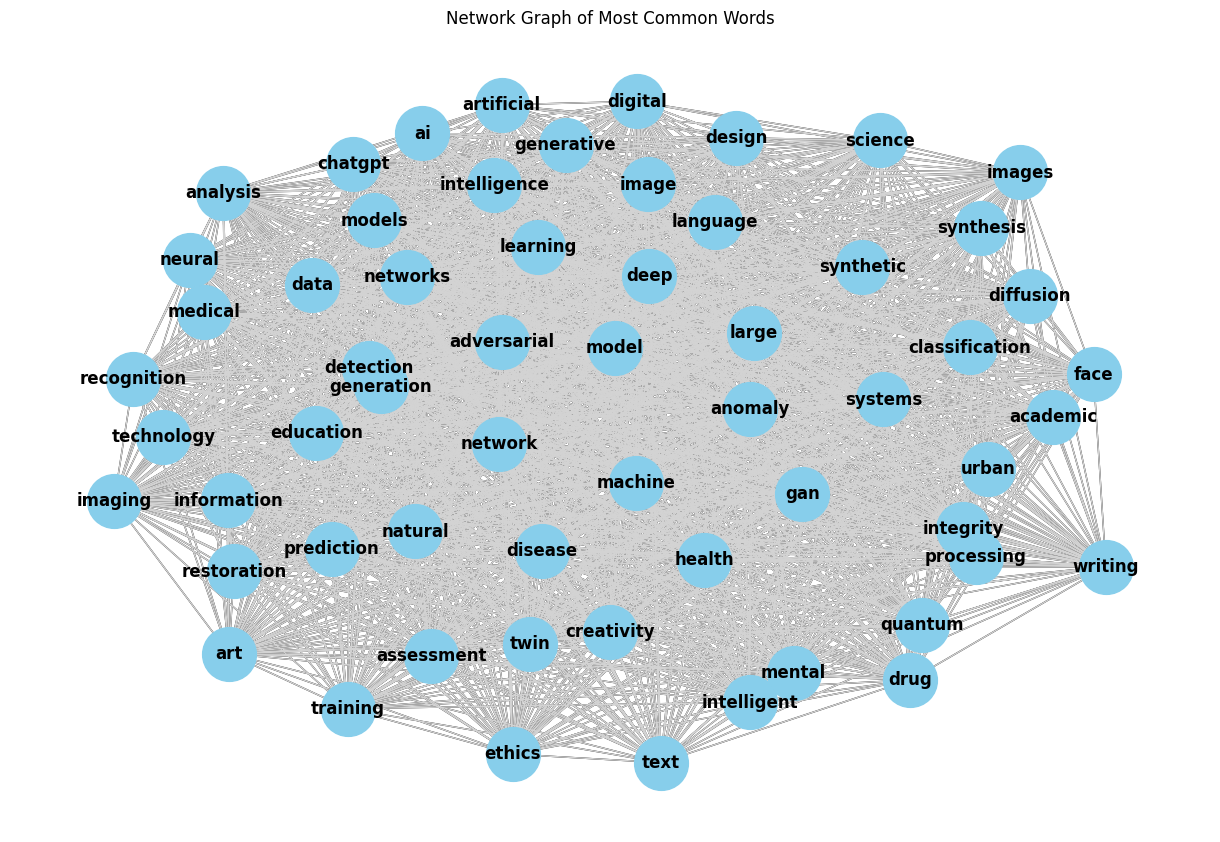

In [ ]:
G = nx.Graph()
#Network graph created for each excel file column
for i, word in enumerate(unique_words):
    G.add_node(word)

for i in range(len(unique_words)):
    for j in range(i+1, len(unique_words)):
        if adj_matrix[i, j] > 0:
            G.add_edge(unique_words[i], unique_words[j], weight=adj_matrix[i, j])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=12, font_weight='bold')

nx.draw_networkx_edges(G, pos, edge_color='lightgray')

plt.title("Network Graph of Most Common Words")
plt.show()

In [ ]:
#repeated the procedure of adjacency matrix and network graph for all the columns in excel file
text_data = df.iloc[:, 1].dropna()
all_words = [word.lower() for text in text_data for word in word_tokenize(str(text))]
all_words = [word for word in all_words if re.match(r'^\w+$', word)]
stop_words = set(stopwords.words('english'))
all_words = [word for word in all_words if word not in stop_words]

word_freq = Counter(all_words)

most_common_words = word_freq.most_common(60)
unique_words = [pair[0] for pair in most_common_words]
print(unique_words)

adj_matrix = np.zeros((len(unique_words), len(unique_words)), dtype=int)

for i, (word1, freq1) in enumerate(most_common_words):
    for j, (word2, freq2) in enumerate(most_common_words):
        if i != j:
            adj_matrix[i, j] = min(freq1, freq2)

print("Adjacency Matrix:")
print(adj_matrix)

['generative', 'intelligence', 'learning', 'artificial', 'ai', 'chatgpt', 'models', 'adversarial', 'deep', 'language', 'networks', 'data', 'large', 'network', 'model', 'image', 'generation', 'education', 'machine', 'design', 'gan', 'neural', 'medical', 'synthesis', 'analysis', 'chatbot', 'modeling', 'chatbots', 'information', 'transformer', 'science', 'technology', 'research', 'health', 'computational', 'assessment', 'digital', 'systems', 'cancer', 'gans', 'detection', 'imaging', 'bard', 'theory', 'writing', 'representation', 'convolutional', 'recognition', 'system', 'innovation', 'academic', 'training', 'quality', 'use', 'chat', 'transformers', 'natural', 'processing', 'llm', 'gpt']
Adjacency Matrix:
[[ 0 71 71 ...  4  4  4]
 [71  0 71 ...  4  4  4]
 [71 71  0 ...  4  4  4]
 ...
 [ 4  4  4 ...  0  4  4]
 [ 4  4  4 ...  4  0  4]
 [ 4  4  4 ...  4  4  0]]


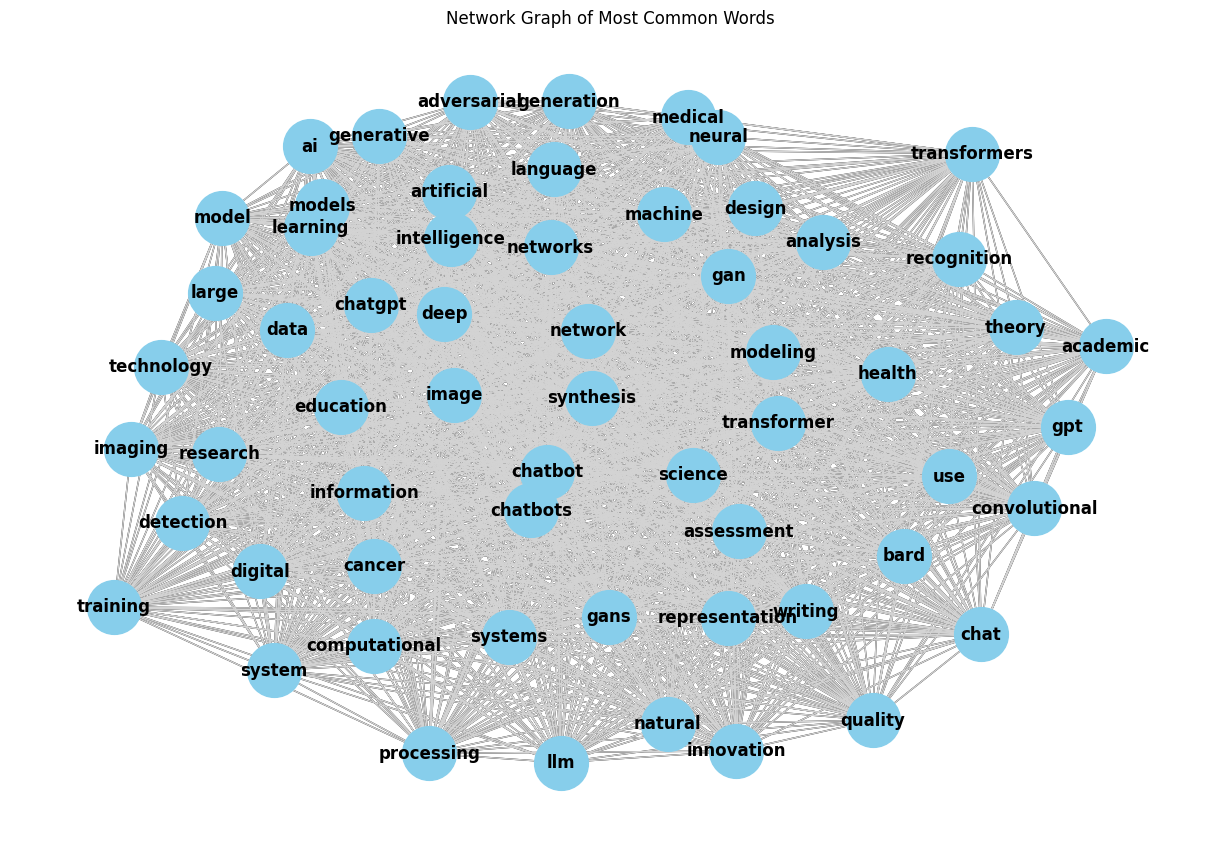

In [ ]:
G = nx.Graph()

for i, word in enumerate(unique_words):
    G.add_node(word)

for i in range(len(unique_words)):
    for j in range(i+1, len(unique_words)):
        if adj_matrix[i, j] > 0:
            G.add_edge(unique_words[i], unique_words[j], weight=adj_matrix[i, j])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=12, font_weight='bold')

nx.draw_networkx_edges(G, pos, edge_color='lightgray')

plt.title("Network Graph of Most Common Words")
plt.show()

In [ ]:
text_data = df.iloc[:, 2].dropna()
all_words = [word.lower() for text in text_data for word in word_tokenize(str(text))]
all_words = [word for word in all_words if re.match(r'^\w+$', word)]
stop_words = set(stopwords.words('english'))
all_words = [word for word in all_words if word not in stop_words]

word_freq = Counter(all_words)

most_common_words = word_freq.most_common(60)
unique_words = [pair[0] for pair in most_common_words]
print(unique_words)
adj_matrix = np.zeros((len(unique_words), len(unique_words)), dtype=int)

for i, (word1, freq1) in enumerate(most_common_words):
    for j, (word2, freq2) in enumerate(most_common_words):
        if i != j:
            adj_matrix[i, j] = min(freq1, freq2)

print("Adjacency Matrix:")
print(adj_matrix)

['generative', 'learning', 'ai', 'intelligence', 'chatgpt', 'artificial', 'deep', 'adversarial', 'models', 'education', 'language', 'networks', 'model', 'network', 'design', 'data', 'image', 'medical', 'large', 'machine', 'digital', 'transformer', 'health', 'analysis', 'processing', 'gpt', 'detection', 'diffusion', 'generation', 'natural', 'research', 'training', 'theory', 'system', 'higher', 'knowledge', 'systems', 'art', 'chatbots', 'imaging', 'modeling', 'augmentation', 'gan', 'graph', 'ethics', 'academic', 'assessment', 'management', 'translation', 'privacy', 'reinforcement', 'computer', 'segmentation', 'face', 'process', 'critical', 'human', 'writing', 'perception', 'educational']
Adjacency Matrix:
[[ 0 66 52 ...  4  4  4]
 [66  0 52 ...  4  4  4]
 [52 52  0 ...  4  4  4]
 ...
 [ 4  4  4 ...  0  4  4]
 [ 4  4  4 ...  4  0  4]
 [ 4  4  4 ...  4  4  0]]


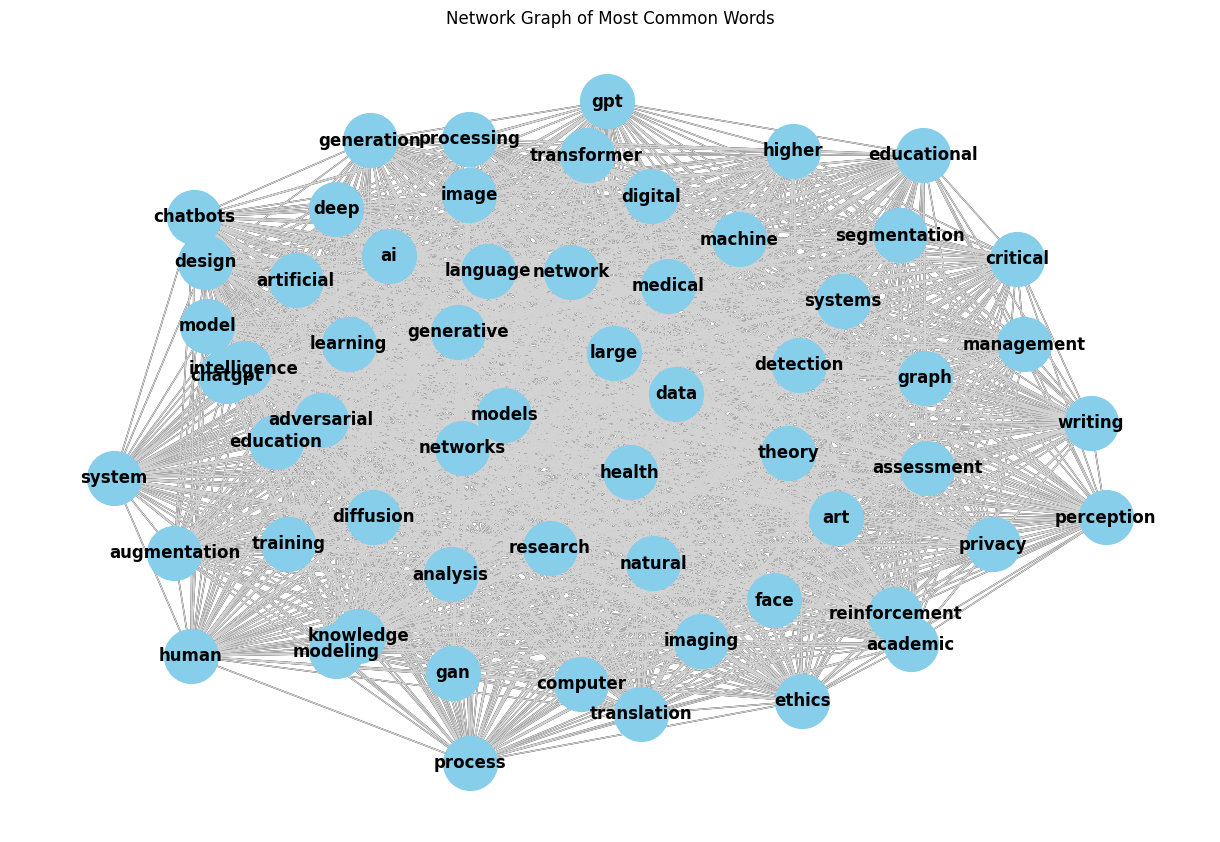

In [ ]:
G = nx.Graph()

for i, word in enumerate(unique_words):
    G.add_node(word)

for i in range(len(unique_words)):
    for j in range(i+1, len(unique_words)):
        if adj_matrix[i, j] > 0:
            G.add_edge(unique_words[i], unique_words[j], weight=adj_matrix[i, j])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=12, font_weight='bold')

nx.draw_networkx_edges(G, pos, edge_color='lightgray')

plt.title("Network Graph of Most Common Words")
plt.show()

In [ ]:
text_data = df.iloc[:, 3].dropna()
all_words = [word.lower() for text in text_data for word in word_tokenize(str(text))]
all_words = [word for word in all_words if re.match(r'^\w+$', word)]
stop_words = set(stopwords.words('english'))
all_words = [word for word in all_words if word not in stop_words]

word_freq = Counter(all_words)

most_common_words = word_freq.most_common(60)
unique_words = [pair[0] for pair in most_common_words]
print(unique_words)

adj_matrix = np.zeros((len(unique_words), len(unique_words)), dtype=int)

for i, (word1, freq1) in enumerate(most_common_words):
    for j, (word2, freq2) in enumerate(most_common_words):
        if i != j:
            adj_matrix[i, j] = min(freq1, freq2)
print("Adjacency Matrix:")
print(adj_matrix)

['generative', 'ai', 'learning', 'artificial', 'intelligence', 'adversarial', 'models', 'networks', 'network', 'language', 'education', 'chatgpt', 'machine', 'data', 'image', 'large', 'neural', 'analysis', 'technology', 'gan', 'digital', 'design', 'deep', 'research', 'model', 'communication', 'segmentation', 'ethical', 'academic', 'integrity', 'generation', 'transformer', 'training', 'chatbot', 'higher', 'information', 'detection', 'health', 'transfer', 'modeling', 'processing', 'translation', 'creativity', 'virtual', 'writing', 'ethics', 'optimization', 'innovation', 'transformers', 'augmentation', 'semantic', 'synthesis', 'classification', 'literacy', 'cycle', 'knowledge', 'engineering', 'computer', 'recognition', 'natural']
Adjacency Matrix:
[[ 0 52 52 ...  4  4  4]
 [52  0 52 ...  4  4  4]
 [52 52  0 ...  4  4  4]
 ...
 [ 4  4  4 ...  0  4  4]
 [ 4  4  4 ...  4  0  4]
 [ 4  4  4 ...  4  4  0]]


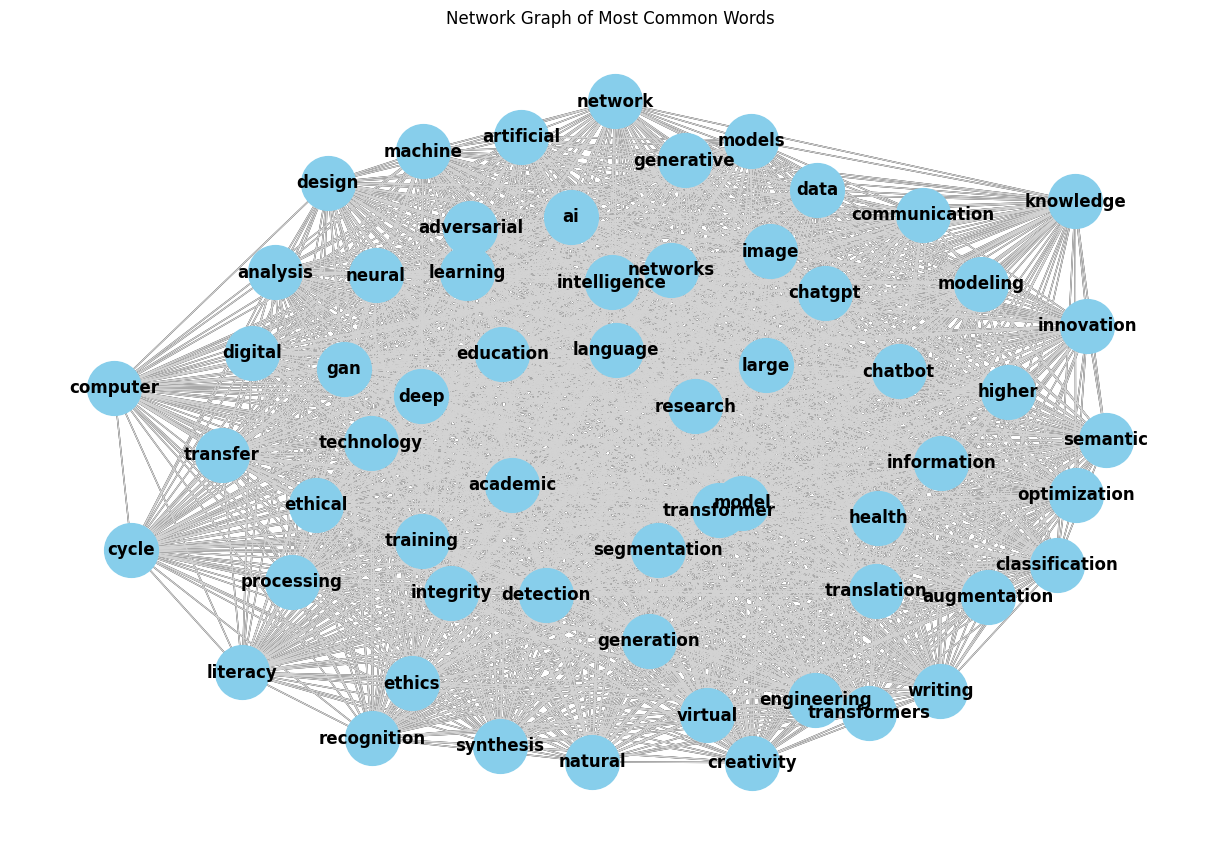

In [ ]:
G = nx.Graph()

for i, word in enumerate(unique_words):
    G.add_node(word)

for i in range(len(unique_words)):
    for j in range(i+1, len(unique_words)):
        if adj_matrix[i, j] > 0:
            G.add_edge(unique_words[i], unique_words[j], weight=adj_matrix[i, j])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=12, font_weight='bold')

nx.draw_networkx_edges(G, pos, edge_color='lightgray')

plt.title("Network Graph of Most Common Words")
plt.show()

In [ ]:
text_data = df.iloc[:, 4].dropna()
all_words = [word.lower() for text in text_data for word in word_tokenize(str(text))]
all_words = [word for word in all_words if re.match(r'^\w+$', word)]
stop_words = set(stopwords.words('english'))
all_words = [word for word in all_words if word not in stop_words]

word_freq = Counter(all_words)

most_common_words = word_freq.most_common(60)
unique_words = [pair[0] for pair in most_common_words]
print(unique_words)
adj_matrix = np.zeros((len(unique_words), len(unique_words)), dtype=int)

for i, (word1, freq1) in enumerate(most_common_words):
    for j, (word2, freq2) in enumerate(most_common_words):
        if i != j:
            adj_matrix[i, j] = min(freq1, freq2)

print("Adjacency Matrix:")
print(adj_matrix)

['learning', 'ai', 'generative', 'language', 'models', 'artificial', 'deep', 'intelligence', 'model', 'machine', 'chatgpt', 'large', 'data', 'gan', 'training', 'network', 'generation', 'image', 'adversarial', 'design', 'health', 'networks', 'vision', 'technology', 'education', 'modeling', 'engineering', 'analysis', 'ethics', 'time', 'neural', 'computer', 'knowledge', 'information', 'assessment', 'academic', 'integrity', 'chatbots', 'communication', 'mental', 'text', 'medical', 'series', 'transformer', 'imaging', 'research', 'detection', 'interaction', 'privacy', 'bard', 'diagnosis', 'gpt', 'fusion', 'healthcare', 'medicine', 'semantic', 'natural', 'processing', 'synthesis', 'chatbot']
Adjacency Matrix:
[[ 0 37 34 ...  4  4  4]
 [37  0 34 ...  4  4  4]
 [34 34  0 ...  4  4  4]
 ...
 [ 4  4  4 ...  0  4  4]
 [ 4  4  4 ...  4  0  4]
 [ 4  4  4 ...  4  4  0]]


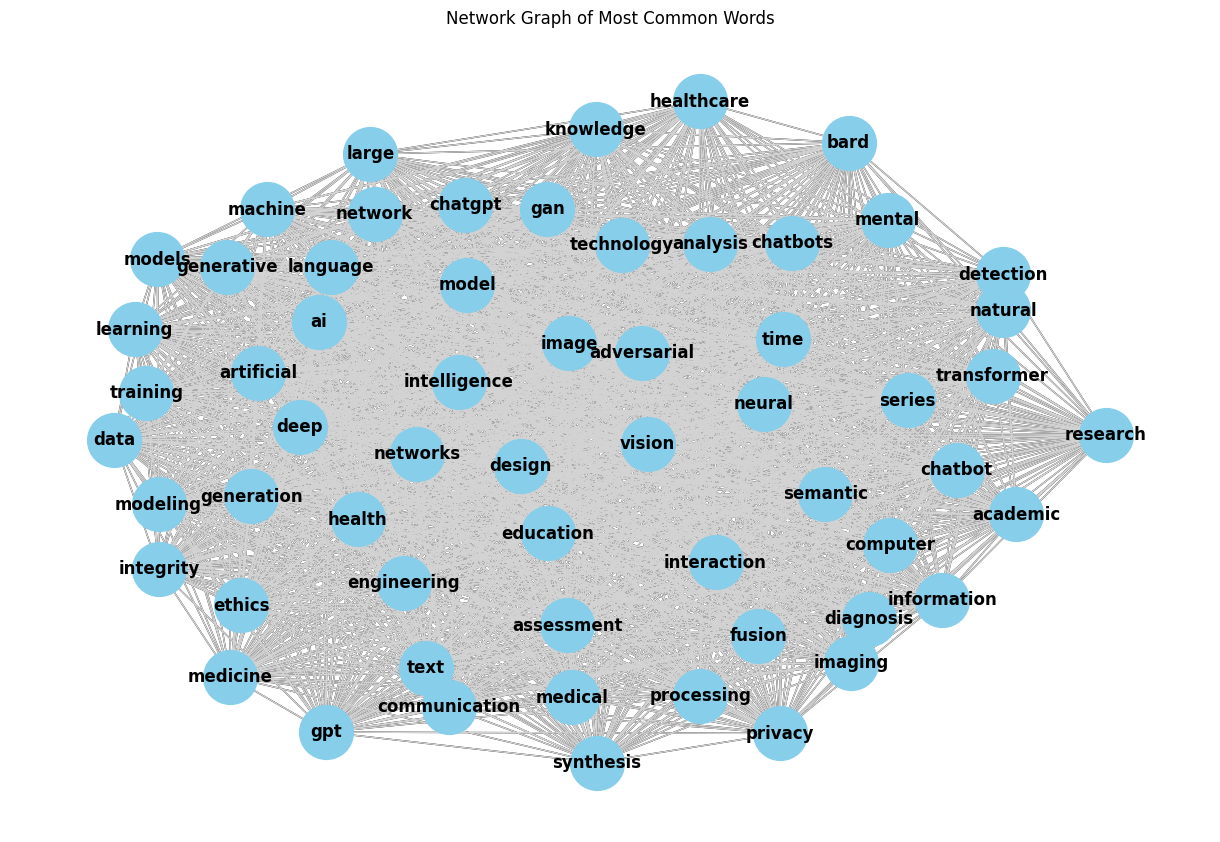

In [ ]:
G = nx.Graph()

for i, word in enumerate(unique_words):
    G.add_node(word)

for i in range(len(unique_words)):
    for j in range(i+1, len(unique_words)):
        if adj_matrix[i, j] > 0:
            G.add_edge(unique_words[i], unique_words[j], weight=adj_matrix[i, j])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=12, font_weight='bold')

nx.draw_networkx_edges(G, pos, edge_color='lightgray')

plt.title("Network Graph of Most Common Words")
plt.show()

In [ ]:
text_data = df.iloc[:, 5].dropna()
all_words = [word.lower() for text in text_data for word in word_tokenize(str(text))]
all_words = [word for word in all_words if re.match(r'^\w+$', word)]
stop_words = set(stopwords.words('english'))
all_words = [word for word in all_words if word not in stop_words]

word_freq = Counter(all_words)

most_common_words = word_freq.most_common(60)
unique_words = [pair[0] for pair in most_common_words]
print(unique_words)
adj_matrix = np.zeros((len(unique_words), len(unique_words)), dtype=int)

for i, (word1, freq1) in enumerate(most_common_words):
    for j, (word2, freq2) in enumerate(most_common_words):
        if i != j:
            adj_matrix[i, j] = min(freq1, freq2)

print("Adjacency Matrix:")
print(adj_matrix)

['generative', 'ai', 'learning', 'artificial', 'intelligence', 'language', 'education', 'data', 'networks', 'machine', 'design', 'models', 'model', 'chatgpt', 'adversarial', 'training', 'image', 'deep', 'transformer', 'large', 'network', 'analysis', 'health', 'neural', 'medical', 'ethics', 'modeling', 'natural', 'processing', 'nlp', 'systems', 'digital', 'classification', 'chatbot', 'engineering', 'system', 'science', 'safety', 'higher', 'medicine', 'remote', 'sensing', 'task', 'augmentation', 'food', 'function', 'llm', 'adaptation', 'healthcare', 'open', 'radiology', 'generators', 'diagnosis', 'gan', 'responsible', 'protection', 'study', 'tourism', 'innovation', 'perceived']
Adjacency Matrix:
[[ 0 26 22 ...  2  2  2]
 [26  0 22 ...  2  2  2]
 [22 22  0 ...  2  2  2]
 ...
 [ 2  2  2 ...  0  2  2]
 [ 2  2  2 ...  2  0  2]
 [ 2  2  2 ...  2  2  0]]


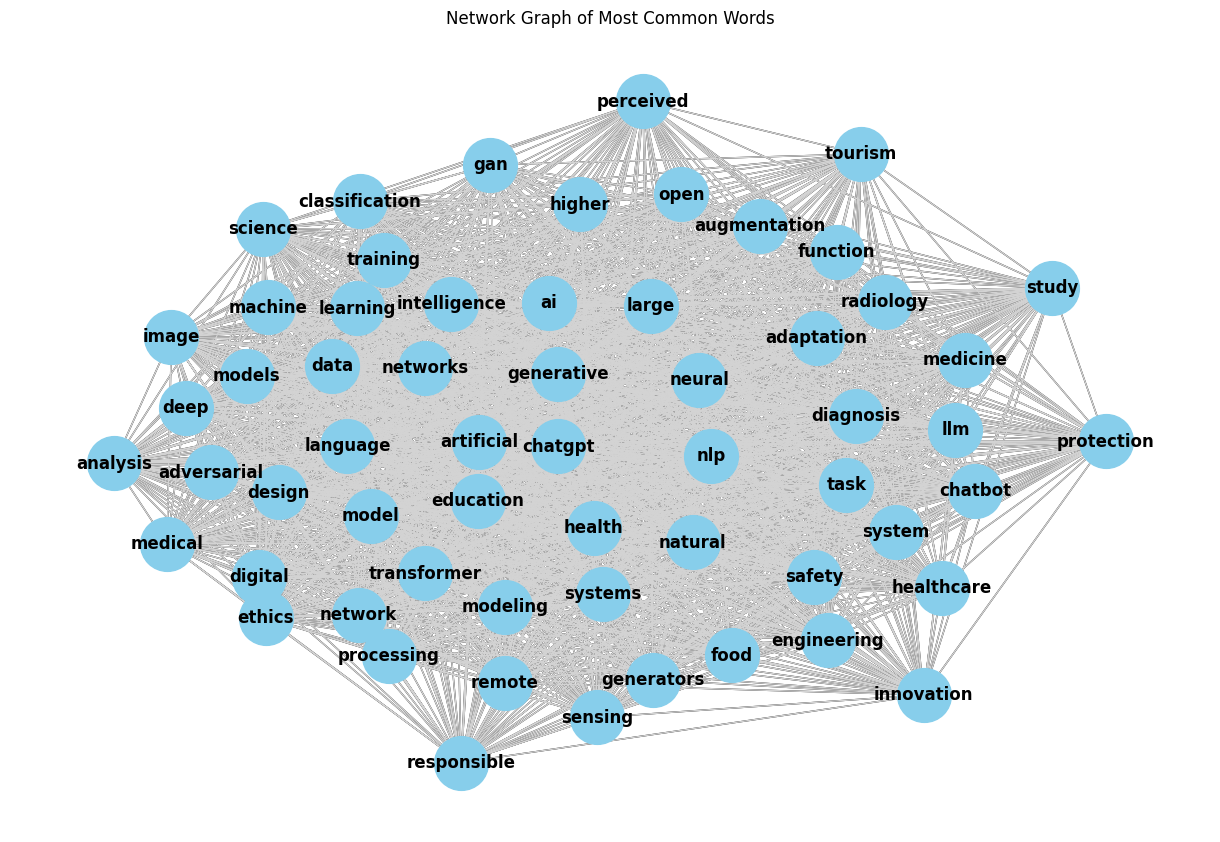

In [ ]:
G = nx.Graph()

for i, word in enumerate(unique_words):
    G.add_node(word)

for i in range(len(unique_words)):
    for j in range(i+1, len(unique_words)):
        if adj_matrix[i, j] > 0:
            G.add_edge(unique_words[i], unique_words[j], weight=adj_matrix[i, j])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=12, font_weight='bold')

nx.draw_networkx_edges(G, pos, edge_color='lightgray')

plt.title("Network Graph of Most Common Words")
plt.show()

In [ ]:
#After looking at all the network graphs the following conclusions can me made with respect to sectors related to generative AI:
"""1. Generative AI highly resides on Deep learning models
2. Generative AI is also linked to natural language processing researches
3. Image generation and analysis is also a new field linked to generative AI
4. Healthcare and medical imaging are also linked with generative AI
5. Education and training fields
6. Synthetic data generation field
7. Art and design domains
8. Mathematics and psychology domain"""